In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("e:/INTERN/3D Printer Material Prediction/datasets/3D printer Material Prediction.csv")

In [446]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7


In [447]:
data

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.06,10.0,100,honeycomb,200,60,60,pla,0,126,27,2.2
62,0.02,6.0,12,grid,205,65,40,pla,28,55,12,1.8
63,0.10,4.0,95,grid,220,75,120,pla,100,121,14,1.5
64,0.15,3.0,85,honeycomb,220,60,60,pla,0,192,33,2.8


In [448]:
data.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strength      0
elongation            0
dtype: int64

In [449]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        66 non-null     float64
 1   wall_thickness      66 non-null     float64
 2   infill_density      66 non-null     int64  
 3   infill_pattern      66 non-null     object 
 4   nozzle_temperature  66 non-null     int64  
 5   bed_temperature     66 non-null     int64  
 6   print_speed         66 non-null     int64  
 7   material            66 non-null     object 
 8   fan_speed           66 non-null     int64  
 9   roughness           66 non-null     int64  
 10  tension_strength    66 non-null     int64  
 11  elongation          66 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ KB


In [450]:
data.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.098182,5.583333,54.727273,222.272727,70.378788,64.242424,48.530303,160.545455,19.757576,1.625000
std,0.062608,2.952943,27.545512,15.094110,8.651839,28.598580,35.834328,95.703899,9.202108,0.762498
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,21.000000,4.000000,0.400000
25%,0.052500,3.000000,40.000000,210.000000,65.000000,40.000000,25.000000,78.250000,12.000000,1.025000
50%,0.100000,6.000000,50.000000,220.000000,70.000000,60.000000,50.000000,149.500000,18.500000,1.500000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,60.000000,75.000000,220.000000,27.000000,2.175000
max,0.200000,12.000000,100.000000,250.000000,100.000000,120.000000,100.000000,368.000000,38.000000,3.300000


In [451]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
lb=LabelEncoder()
data=data.iloc[:,:]

In [452]:
data["infill_pattern"]=lb.fit_transform(data["infill_pattern"])

In [453]:
data["material"]=lb.fit_transform(data["material"])

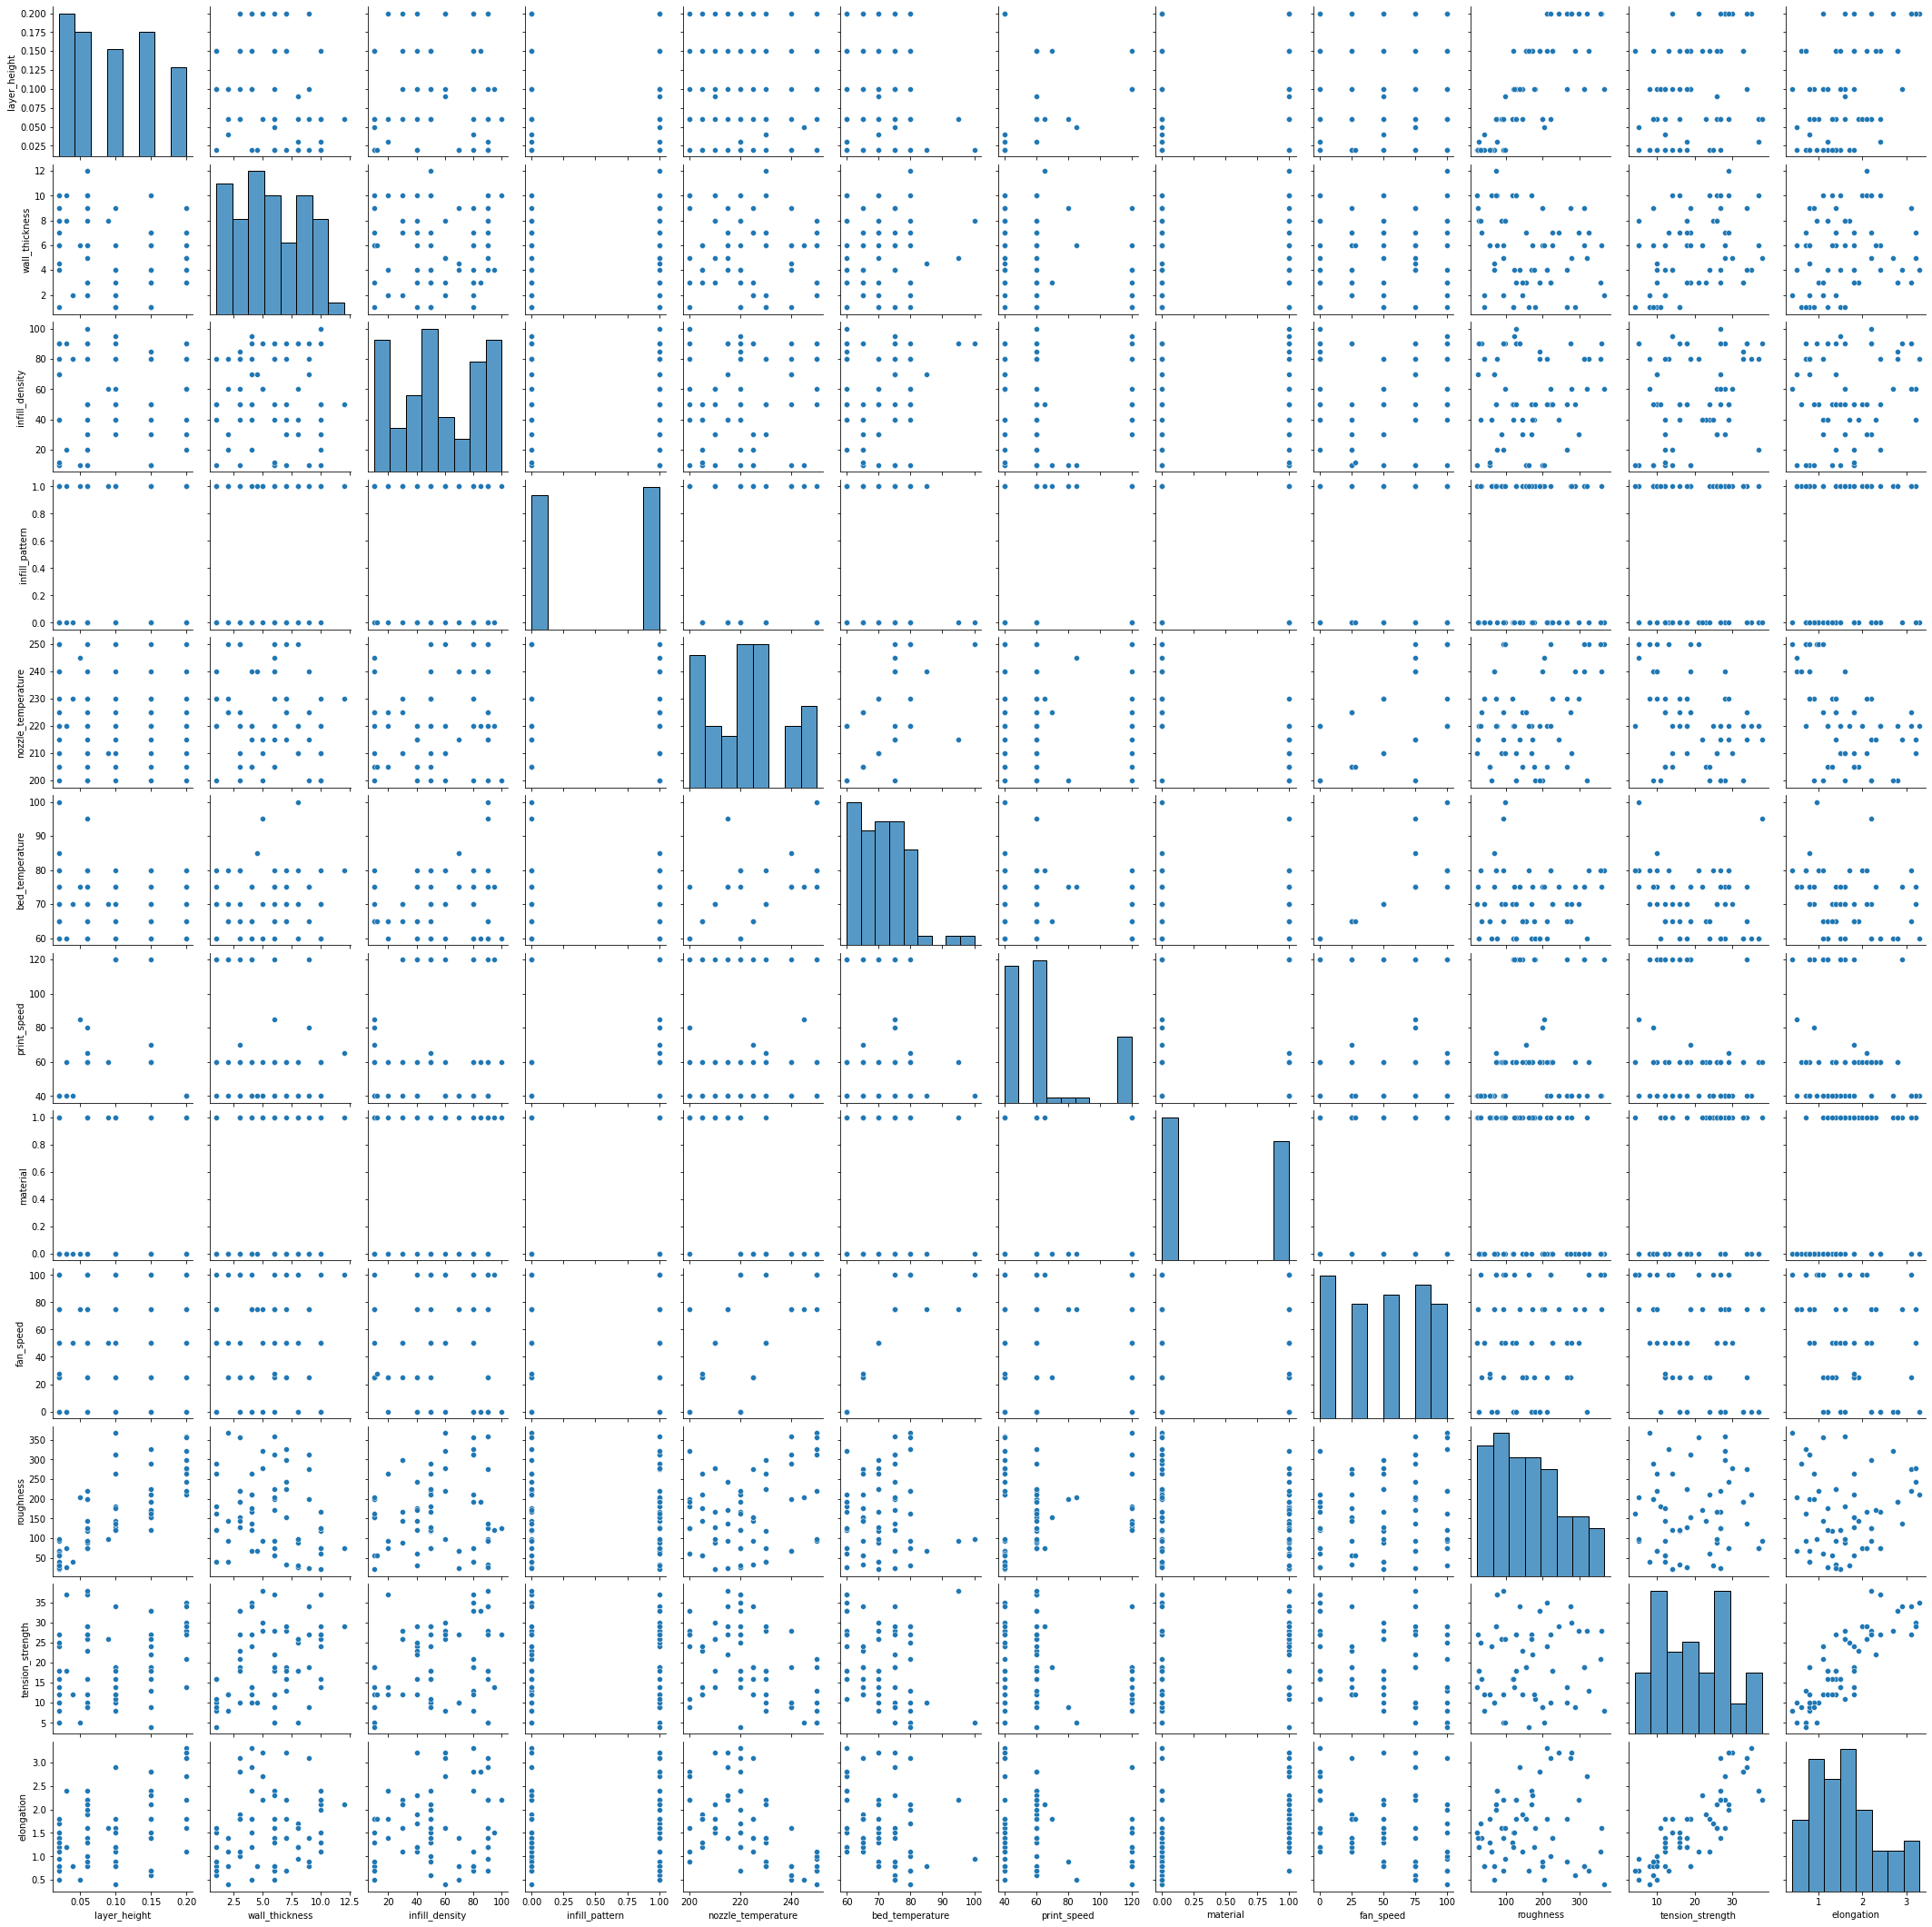

In [454]:
sns.pairplot(data)

<AxesSubplot:>

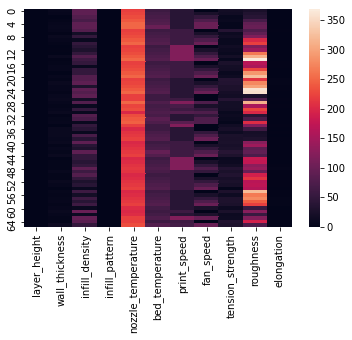

In [455]:
sns.heatmap(data[['layer_height','wall_thickness','infill_density','infill_pattern','nozzle_temperature','bed_temperature','print_speed','fan_speed','tension_strength','roughness','elongation']])

In [456]:
x=data.iloc[:,[0,1,2,3,4,5,6,8,9,10,11]].values

In [457]:
y=data.iloc[:,7].values

In [458]:
x

array([[2.00e-02, 8.00e+00, 9.00e+01, 0.00e+00, 2.20e+02, 6.00e+01,
        4.00e+01, 0.00e+00, 2.50e+01, 1.80e+01, 1.20e+00],
       [2.00e-02, 7.00e+00, 9.00e+01, 1.00e+00, 2.25e+02, 6.50e+01,
        4.00e+01, 2.50e+01, 3.20e+01, 1.60e+01, 1.40e+00],
       [2.00e-02, 1.00e+00, 8.00e+01, 0.00e+00, 2.30e+02, 7.00e+01,
        4.00e+01, 5.00e+01, 4.00e+01, 8.00e+00, 8.00e-01],
       [2.00e-02, 4.00e+00, 7.00e+01, 1.00e+00, 2.40e+02, 7.50e+01,
        4.00e+01, 7.50e+01, 6.80e+01, 1.00e+01, 5.00e-01],
       [2.00e-02, 6.00e+00, 9.00e+01, 0.00e+00, 2.50e+02, 8.00e+01,
        4.00e+01, 1.00e+02, 9.20e+01, 5.00e+00, 7.00e-01],
       [2.00e-02, 8.00e+00, 9.00e+01, 0.00e+00, 2.50e+02, 1.00e+02,
        4.00e+01, 1.00e+02, 9.80e+01, 5.00e+00, 9.50e-01],
       [6.00e-02, 6.00e+00, 8.00e+01, 0.00e+00, 2.20e+02, 6.00e+01,
        6.00e+01, 0.00e+00, 7.50e+01, 3.70e+01, 2.40e+00],
       [6.00e-02, 2.00e+00, 2.00e+01, 1.00e+00, 2.25e+02, 6.50e+01,
        6.00e+01, 2.50e+01, 9.20e+01, 1.20e

In [459]:

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [460]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 0)

In [461]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [462]:
x_train=sc.fit_transform(x_train)

In [463]:
x_test=sc.fit_transform(x_test)

In [464]:
from sklearn.tree import DecisionTreeClassifier


In [465]:
dtree=DecisionTreeClassifier(criterion='entropy')

In [466]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [467]:
predictions=dtree.predict(x_test)

In [468]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
fpr,tpr,threshold=metrics.roc_curve(y_test,predictions)
roc_auc_dt=metrics.auc(fpr,tpr)
roc_auc_dt

0.9205882352941176

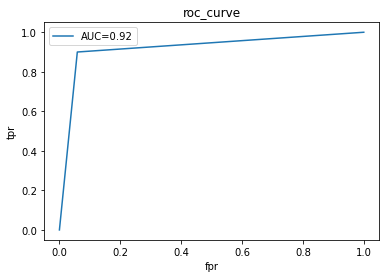

In [469]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc_dt)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc_curve")
plt.legend()

In [470]:
import pickle
pickle.dump(dtree,open('PRJ.pkl','wb'))